# 數值計算

## 逼近法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

我們示範的函數如下

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

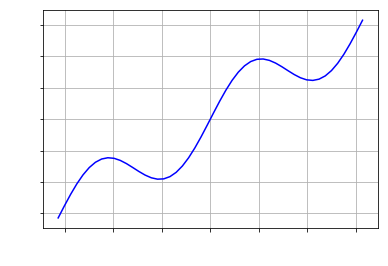

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x',color='w')
plt.ylabel('f(x)',color='w')
plt.xticks(color='w')
plt.yticks(color='w')

#### 回歸

典型向量化風格的polyfit和polyval線性回歸(deg=1)的應用方式如下

In [5]:
reg = np.polyfit(x, f(x), deg=1)

In [6]:
ry = np.polyval(reg, x)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

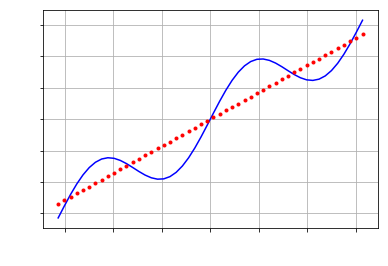

In [7]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x',color='w')
plt.ylabel('f(x)',color='w')
plt.xticks(color='w')
plt.yticks(color='w')

我們使用更高次的單項式

In [8]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

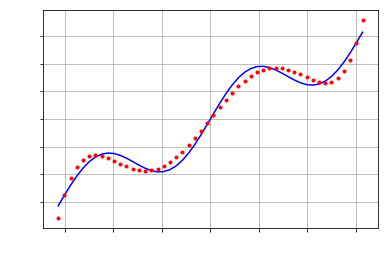

In [9]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x',color='w')
plt.ylabel('f(x)',color='w')
plt.xticks(color='w')
plt.yticks(color='w')

In [10]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

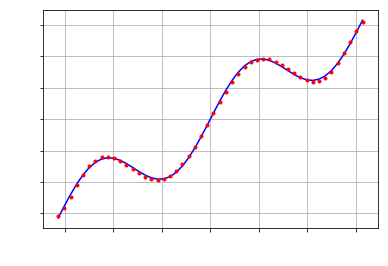

In [11]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x',color='w')
plt.ylabel('f(x)',color='w')
plt.xticks(color='w')
plt.yticks(color='w')

幾乎完全一樣了，但是檢查的結果並不完美

In [12]:
np.allclose(f(x), ry)

False

但是，均方差不是太大

In [13]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517628

一般來說，當你選擇更好的基函數時，可以得到更好的回歸結果，例子中，多項是最高為3次

In [14]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

numpy.linalg提供lstsq函數，以解決最小二乘優化問題

In [15]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

我們可以得到單個基函數的最優參數

In [16]:
reg

array([  3.73659739e-16,   5.62777448e-01,   0.00000000e+00,
        -5.43553615e-03])

為了獲得回歸估算結果，我們對req和matrix的點乘

In [17]:
ry = np.dot(reg, matrix)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

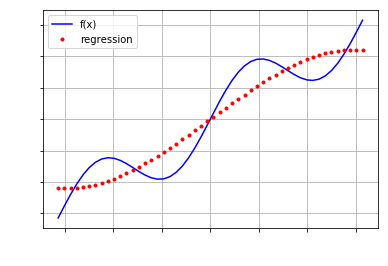

In [18]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x',color='w')
plt.ylabel('f(x)',color='w')
plt.legend(loc=0)
plt.xticks(color='w')
plt.yticks(color='w')

我們替換最高次的單項次試試

In [19]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

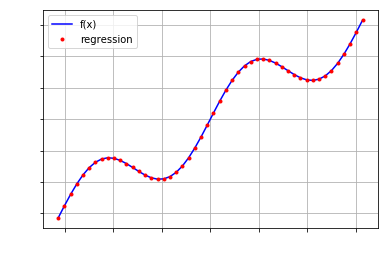

In [20]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.grid(True)
plt.xlabel('x',color='w')
plt.ylabel('f(x)',color='w')
plt.legend(loc=0)
plt.xticks(color='w')
plt.yticks(color='w')

In [21]:
np.allclose(f(x), ry)

True

In [22]:
np.sum((f(x) - ry) ** 2) /len(x)

3.1327946847380535e-31

In [23]:
reg

array([  3.73659739e-16,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

### 凸優化

In [24]:
def fm(x, y):
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

In [25]:
x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
X, Y = np.meshgrid(x,y)
Z = fm(X, Y)

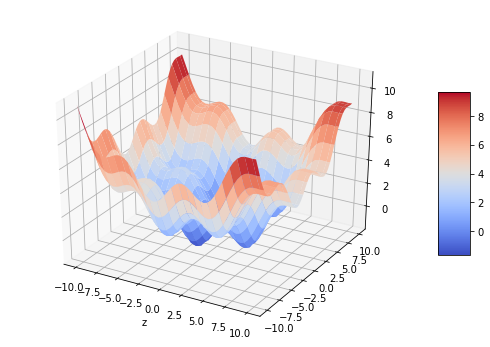

In [26]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_xlabel('y')
ax.set_xlabel('z')
fig.colorbar(surf, shrink=0.5, aspect=5)

#### 上方的圖有多個局部最小值及一個全局最小值
接下來，我們要實施全局最小化和局部最小化的方法

#### 全局優化

In [27]:
import scipy.optimize as spo

In [28]:
def fo(p):
    x = p[0]
    y = p[1]
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x,y,z))
    return z

In [29]:
output = True
opt1 = spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)
opt1

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [30]:
fm(opt1[0], opt1[1])

0.0

最優解是在0,0位置上，z的值為0

#### 局部優化

In [31]:
output = True
spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)

  0.0000   0.0000   0.0000
  0.0003   0.0000   0.0003
  0.0000   0.0003   0.0003
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3


array([ 0.,  0.])

#### 積分

In [32]:
import scipy.integrate as sci

In [33]:
def f(x):
    return np.sin(x) + 0.5*x

$$\int_{0.5}^{9.5}sin(x)+0.5xdx$$

In [34]:
a = 0.5
b = 9.5
x = np.linspace(0, 10)
y = f(x)

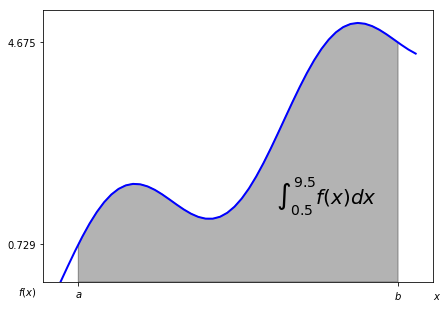

In [36]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7,5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

Ix = np.linspace(a,b)
Iy = f(Ix)
verts = [(a,0)] + list(zip(Ix, Iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75 * (a+b), 1.5, r"$\int_{0.5}^{9.5}f(x)dx$", horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.09, '$f(x)$')

ax.set_xticks((a,b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

### 數值積分

In [37]:
# 高斯求積
sci.fixed_quad(f,a,b)[0]

24.366995967084602

In [38]:
#自適應求積
sci.quad(f,a,b)[0]

24.374754718086752

In [40]:
#龍貝格積分
sci.romberg(f,a,b)

24.374754718086713

#### 通過模擬求取積分（蒙特卡洛模擬）

In [42]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i*10) * (b-a) + a
    print(np.sum(f(x)) / len(x) * (b-a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


### 符號計算

In [43]:
import sympy as sy

In [44]:
x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)

sympy.core.symbol.Symbol

In [45]:
sy.sqrt(x)

sqrt(x)

In [46]:
3 + sy.sqrt(x) - 4**2

sqrt(x) - 13

In [47]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3/2
sy.simplify(f)

1.5*x**2 + 4.5

In [52]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f)) # ascii 公式生成器

     2      
1.5*x  + 4.5


In [51]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


#### 方程式

解x^2-1=0的方程式

In [53]:
sy.solve(x**2-1)

[-1, 1]

In [54]:
sy.solve(x ** 3 + 0.5 ** 2 - 1)

[0.90856029641607, -0.454280148208035 - 0.786836297566236*I, -0.454280148208035 + 0.786836297566236*I]

In [55]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

#### 積分

In [56]:
a, b = sy.symbols('a b')

In [58]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x,a,b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


In [71]:
init_func = sy.integrate(sy.sin(x) + 0.5 * x)

In [72]:
Fb = init_func.subs(x, 9.5).evalf()
Fa = init_func.subs(x, 0.5).evalf()

In [73]:
Fb - Fa

24.3747547180867

In [74]:
sy.integrate(sy.sin(x) + 0.5 * x, (x,0.5,9.5))

24.3747547180867

#### 微分

In [78]:
init_func.diff()

0.5*x + sin(x)

In [79]:
f = (sy.sin(x) + 0.05 * x ** 2 + sy.sin(y) + 0.05 * y ** 2)

In [81]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [82]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

全局最小值的必要(但不充分)的條件之一是兩個偏微分都是0

In [84]:
x0 = sy.nsolve(del_x, -1.5)
x0

mpf('-1.4275517787645941')

In [86]:
y0 = sy.nsolve(del_y, -1.5)
y0

mpf('-1.4275517787645941')

In [88]:
f.subs({x:x0, y:y0}).evalf() # global minimum

-1.77572565314742